<a href="https://colab.research.google.com/github/wlcosta/es235_pdi/blob/master/18_haar_pt2/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 18 - Detecção de Faces usando Classificadores Haar **(parte 2)**

### Classificadores cascata LBP

Começamos importando as bibliotecas necessárias:

In [ ]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/mila.jpg

--2021-06-30 22:03:46--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/mila.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19477 (19K) [image/jpeg]
Saving to: ‘mila.jpg’

mila.jpg            100%[===================>]  19.02K  --.-KB/s    in 0s      

2021-06-30 22:03:46 (74.7 MB/s) - ‘mila.jpg’ saved [19477/19477]



Vamos estudar os básicos da detecção de faces usando os classificadores baseados em LBP. Esse notebook vai ser muito parecido com o da outra parte pra que a comparação seja mais fácil.

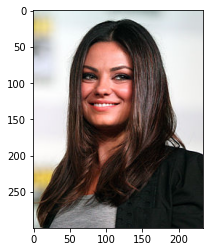

In [ ]:
img = plt.imread('mila.jpg')
plt.imshow(img)

Os classificadores são salvos em um formato XML. No caso dos classificadores LBP, não há um classificador pré-treinado para olhos no repositório do OpenCV.

In [ ]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/pt2/lbp_class/lbpcascade_frontalface.xml
face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

--2021-06-30 22:05:18--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/pt2/lbp_class/lbpcascade_frontalface.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50351 (49K) [text/plain]
Saving to: ‘lbpcascade_frontalface.xml’

lbpcascade_frontalf 100%[===================>]  49.17K  --.-KB/s    in 0.007s  

2021-06-30 22:05:19 (7.36 MB/s) - ‘lbpcascade_frontalface.xml’ saved [50351/50351]



Precisamos converter a imagem para tons de cinza:

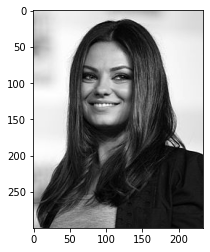

In [ ]:
cinza = None
plt.imshow(cinza, cmap="gray")

Com o classificador carregado, usaremos o pipeline que definimos antes.

Complete o código abaixo, chamando o método `face_cascade.detectMultiScale` com os seguintes argumentos:

1. A imagem em tons de cinza
2. O fator de escala `scaleFactor=1.3` que configura a escala de redução da imagem a cada escalamento
3. O parâmetro `minNeighbors=5` que especifica quantos retângulos cada candidato precisa reter.

In [ ]:
faces = None

Vamos usar a função `len()` para contar quantos rostos nós conseguimos detectar na imagem.

A saída do método é uma matriz de tamanho `(n, 4)` onde `n` é o número de faces detectadas, com 4 informações pra cada face: posição x e y do centro do retângulo, largura e altura do retângulo.

Vamos usar essas informações para desenhar um quadrado ao redor do rosto na imagem, que é o bounding-box que aprendemos na última aula.

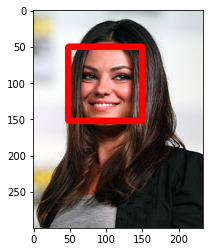

In [ ]:
assert len(faces) > 0, "Nenhuma face detectada"
img_c = img.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
    plt.imshow(img_c)

Vamos tentar com outra imagem. Novamente, vamos pra cena do Tony Stark nos Vingadores. Complete novamente carregando para tons de cinza e e chamando o método `face_cascade.detectMultiScale` com os mesmos argumentos de antes.

--2021-06-30 22:10:10--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/stark.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39011 (38K) [image/jpeg]
Saving to: ‘stark.jpg’

stark.jpg           100%[===================>]  38.10K  --.-KB/s    in 0.002s  

2021-06-30 22:10:10 (18.6 MB/s) - ‘stark.jpg’ saved [39011/39011]



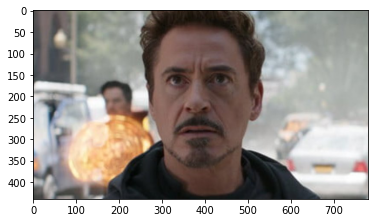

In [ ]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/stark.jpg
img = plt.imread('stark.jpg')
plt.imshow(img)

In [ ]:
cinza = None
faces = None

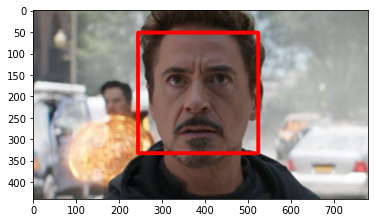

In [ ]:
img_c = img.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
   
plt.imshow(img_c)

Os resultados são bem similares com os do Haar. Vamos compará-los:

In [ ]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/pt1/class/haarcascade_frontalface_default.xml

--2021-06-30 22:32:07--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/pt1/class/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2021-06-30 22:32:08 (21.9 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
face_cascade_haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = plt.imread('mila.jpg')
cinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces = face_cascade_haar.detectMultiScale(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), scaleFactor=1.3, minNeighbors=5)
len(faces)

1

In [ ]:
import time

face_cascade_lbp = cv2.CascadeClassifier('lbpcascade_frontalface.xml')
face_cascade_haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

imgs = ['mila', 'stark']
types = ['lbp', 'haar']

def runClassifier(img_n, type_n, num):
  print(img_n, type_n, num)
  if img_n == "mila":
    img = plt.imread('mila.jpg')
  elif img_n == "stark":
    img = plt.imread('stark.jpg')

  cinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  
  if type_n == "lbp":
    inicio = time.time()
    faces = None # Lembrar que o método agora está em face_cascade_lbp
    final = time.time() - inicio
  elif type_n == "haar":
    inicio = time.time()
    faces = None # E aqui, face_cascade_haar
    final = time.time() - inicio

  print("Na imagem %s com shape (%dx%d), o descritor %s leva %.2f (%d fps)"
        % (img_n, img.shape[0], img.shape[1], type_n, final, 1/final))

for id, config in enumerate([(img_n, type_n) for img_n in imgs for type_n in types]):
  runClassifier(config[0], config[1], int('11%d'%(id+1)))

mila lbp 111
Na imagem mila com shape (300x234), o descritor lbp leva 0.01 (90 fps)
mila haar 112
Na imagem mila com shape (300x234), o descritor haar leva 0.02 (66 fps)
stark lbp 113
Na imagem stark com shape (439x780), o descritor lbp leva 0.04 (25 fps)
stark haar 114
Na imagem stark com shape (439x780), o descritor haar leva 0.08 (12 fps)


O LBP é muito mais rápido. Os resultados estão similares, mas isso não é regra: o LBP tende a ser pior que o Haar.
O trade-off entre velocidade e precisão é claro.

### Visualizando o LBP

Vamos visualizar um vetor LBP. Para isso, vamos trabalhar com o `scikit-image`, mais especificamente com o método [local_binary_pattern()](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.local_binary_pattern).

Os argumentos que iremos usar são:
1. Imagem em grayscale;
2. `pint=10`: Número de vizinhos circularmente simétricos;
3. `Rfloat=5`: Raio dos círculos;
4. `method="default"`: invariante à rotação.

Outros métodos possuem outras invariâncias. Consultar a documentação par mais detalhes.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f82ed47d510>,
 Text(0.5, 1.0, 'Features da imagem original'))

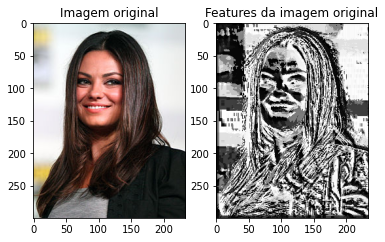

In [ ]:
from skimage import feature


mila = plt.imread('mila.jpg')
lbp = feature.local_binary_pattern(cv2.cvtColor(mila, cv2.COLOR_RGB2GRAY), 10, 5, method="default")
plt.subplot(121),plt.imshow(mila),plt.title('Imagem original')
plt.subplot(122),plt.imshow(lbp.astype("uint8"), cmap="gray"),plt.title('Features da imagem original')

Vamos ainda plotar o histograma desse vetor. Seguimos os mesmos passos do notebook de histogramas:

(0.0, 0.03)

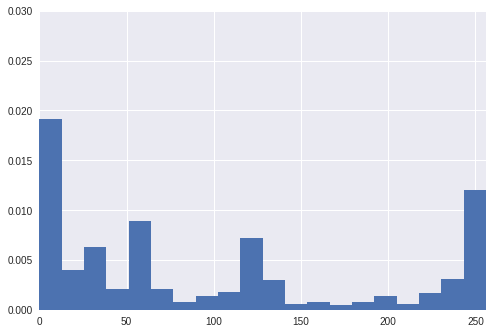

In [ ]:
plt.style.use("seaborn")
(fig, ax) = plt.subplots()
ax.hist(lbp.ravel(), density=True, bins=20, range=(0, 256))
ax.set_xlim([0, 256])
ax.set_ylim([0, 0.030])

### Criando o seu classificador

# Atenção

As células abaixo não são compatíveis com o Google Colab devido à necessidade de executar binários do Windows para criar o dataset. Também é possível seguir esses passos em sistemas GNU/Linux e MacOS, mas com as versões específicas do OpenCV instaladas nativamente na máquina (não apenas a versão em Python).

Se você desejar seguir, será necessário baixar o notebook e executá-lo com o `jupyter`.


---



Criar o classificador baseado em LBP é muito mais rápido do que baseado em Haar. O pipeline é o mesmo, então podemos executar as mesmas células que no exemplo anterior:

Para agilizar, as imagens negativas e as anotações estão disponibilizadas junto com o repositório. 
Essas imagens já são tratadas e não possuem nenhuma imagem fora da categoria correta. Essas são as **imagens negativas**.

Vamos extraí-las:

In [ ]:
import zipfile
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/neg.zip

zipfilePath = ("./neg.zip")
zip = zipfile.ZipFile(zipfilePath)
zip.extractall(".")
zip.close()

--2021-06-30 22:43:30--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/neg.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13837960 (13M) [application/zip]
Saving to: ‘neg.zip’

neg.zip             100%[===================>]  13.20M  --.-KB/s    in 0.1s    

2021-06-30 22:43:31 (119 MB/s) - ‘neg.zip’ saved [13837960/13837960]



Iremos gerar nossas imagens positivas a partir das imagens negativas. Por não termos um conjunto de imagens positivas anotadas, esse caminho é o caminho mais simples.

Isso é muito comum para detectar e rastrear marcas em uma cena, por exemplo.

A imagem que iremos localizar na cena é a abaixo:

--2021-06-30 22:43:41--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/aerocool.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13537 (13K) [image/jpeg]
Saving to: ‘aerocool.jpg’

aerocool.jpg        100%[===================>]  13.22K  --.-KB/s    in 0s      

2021-06-30 22:43:42 (49.5 MB/s) - ‘aerocool.jpg’ saved [13537/13537]



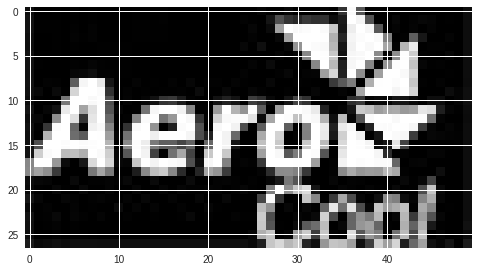

In [ ]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/aerocool.jpg
aero = plt.imread('aerocool.jpg')
plt.imshow(aero)

Vamos criar um diretório para armazenar as imagens positivas:

In [ ]:
import os
if not os.path.exists('info'):
    os.mkdir('info')

Iremos executar o binário **opencv_createsamples.exe**. Este binário recebe uma imagem positiva (aerocool.jpg) e aplica essa imagem nas imagens negativas, gerando assim, imagens positivas.

In [ ]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/opencv_bin_pack.zip
zipfilePath = ("./opencv_bin_pack.zip")
zip = zipfile.ZipFile(zipfilePath)
zip.extractall(".")
zip.close()

--2021-06-30 22:44:09--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/opencv_bin_pack.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23633719 (23M) [application/zip]
Saving to: ‘opencv_bin_pack.zip’

opencv_bin_pack.zip 100%[===================>]  22.54M   121MB/s    in 0.2s    

2021-06-30 22:44:10 (121 MB/s) - ‘opencv_bin_pack.zip’ saved [23633719/23633719]



In [ ]:
from subprocess import check_output
check_output("opencv_createsamples.exe -img aerocool.jpg -bg bg.txt -info info/info.lst -pngoutput info -maxxangle 0.5 -maxyangle 0.5 -maxzangle 0.5 -num 1950", shell=True)

b'Info file name: info/info.lst\r\nImg file name: aerocool.jpg\r\nVec file name: (NULL)\r\nBG  file name: bg.txt\r\nNum: 1950\r\nBG color: 0\r\nBG threshold: 80\r\nInvert: FALSE\r\nMax intensity deviation: 40\r\nMax x angle: 0.5\r\nMax y angle: 0.5\r\nMax z angle: 0.5\r\nShow samples: FALSE\r\nWidth: 24\r\nHeight: 24\r\nMax Scale: -1\r\nRNG Seed: 12345\r\nCreate test samples from single image applying distortions...\r\nOpen background image: neg/1343.jpg\r\nOpen background image: neg/1106.jpg\r\nOpen background image: neg/812.jpg\r\nOpen background image: neg/325.jpg\r\nOpen background image: neg/770.jpg\r\nOpen background image: neg/204.jpg\r\nOpen background image: neg/1709.jpg\r\nOpen background image: neg/556.jpg\r\nOpen background image: neg/2067.jpg\r\nOpen background image: neg/1750.jpg\r\nOpen background image: neg/21.jpg\r\nOpen background image: neg/1480.jpg\r\nOpen background image: neg/2350.jpg\r\nOpen background image: neg/1930.jpg\r\nOpen background image: neg/1247.jpg\r\

Podemos ver abaixo como as imagens são salvas:

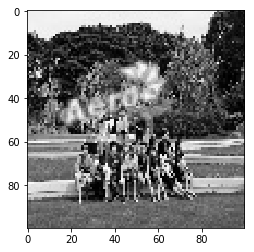

In [ ]:
plt.imshow(plt.imread('info/0001_0010_0010_0060_0060.jpg'), cmap="gray")

Como já temos as nossas imagens positivas, vamos gerar nosso dataset. Os passos anteriores poderiam ter sido substituídos por várias imagens de uma mesma classe, como por exemplo, fotos de qualquer objeto.

Vamos executar novamente o comando anterior, agora passando o diretório das imagens positivas:

In [ ]:
check_output("opencv_createsamples.exe -info info/info.lst -num 1950 -w 20 -h 20 -vec positives.vec", shell=True)

b'Info file name: info/info.lst\r\nImg file name: (NULL)\r\nVec file name: positives.vec\r\nBG  file name: (NULL)\r\nNum: 1950\r\nBG color: 0\r\nBG threshold: 80\r\nInvert: FALSE\r\nMax intensity deviation: 40\r\nMax x angle: 1.1\r\nMax y angle: 1.1\r\nMax z angle: 0.5\r\nShow samples: FALSE\r\nWidth: 20\r\nHeight: 20\r\nMax Scale: -1\r\nRNG Seed: 12345\r\nCreate training samples from images collection...\r\nDone. Created 1950 samples\r\n'

### Diferença no treinamento entre o LBP e o Haar

Os passos anteriores eram iguais ao do último notebook, a diferença está apenas no **treinamento**. Usamos o mesmo comando, mas precisamos adicionar o argumento **-featureType LBP**. Podemos ver que com LBP o treinamento é bem mais rápido:

- Core i7-4790K - **Haar**: 6 minutos;
- Core i7-4790K - **LBP**: 8 segundos.

In [ ]:
if not os.path.exists('data'):
    os.mkdir('data')

check_output(".\opencv_traincascade.exe -featureType LBP -data data -vec positives.vec -bg bg.txt -numPos 1800 -numNeg 900 -numStages 10 -w 20 -h 20", shell=True)

b'PARAMETERS:\r\ncascadeDirName: data\r\nvecFileName: positives.vec\r\nbgFileName: bg.txt\r\nnumPos: 1800\r\nnumNeg: 900\r\nnumStages: 10\r\nprecalcValBufSize[Mb] : 1024\r\nprecalcIdxBufSize[Mb] : 1024\r\nacceptanceRatioBreakValue : -1\r\nstageType: BOOST\r\nfeatureType: LBP\r\nsampleWidth: 20\r\nsampleHeight: 20\r\nboostType: GAB\r\nminHitRate: 0.995\r\nmaxFalseAlarmRate: 0.5\r\nweightTrimRate: 0.95\r\nmaxDepth: 1\r\nmaxWeakCount: 100\r\nNumber of unique features given windowSize [20,20] : 3969\r\n\r\n===== TRAINING 0-stage =====\r\n<BEGIN\r\nPOS current samples: 1\rPOS current samples: 2\rPOS current samples: 3\rPOS current samples: 4\rPOS current samples: 5\rPOS current samples: 6\rPOS current samples: 7\rPOS current samples: 8\rPOS current samples: 9\rPOS current samples: 10\rPOS current samples: 11\rPOS current samples: 12\rPOS current samples: 13\rPOS current samples: 14\rPOS current samples: 15\rPOS current samples: 16\rPOS current samples: 17\rPOS current samples: 18\rPOS curre

Com o classificador treinado, podemos carregá-lo e testar na nossa imagem. Com o Haar era necessário tunar o parâmetro **minSize=(60, 60)** pra que ele detectasse corretamente. O LBP parece funcionar bem:

In [ ]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/gabinete.jpeg
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/data.zip

img = plt.imread('gabinete.jpeg')
cinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

if not os.path.exists('data'):
    zipfilePath = ("./data.zip")
    zip = zipfile.ZipFile(zipfilePath)
    zip.extractall(".")
    zip.close()

marca = cv2.CascadeClassifier('data/cascade.xml')
marcas = None #(chame o método de "marca")
print(len(marcas))

--2021-06-30 22:44:42--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/gabinete.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53673 (52K) [image/jpeg]
Saving to: ‘gabinete.jpeg’

gabinete.jpeg       100%[===================>]  52.42K  --.-KB/s    in 0.007s  

2021-06-30 22:44:43 (7.18 MB/s) - ‘gabinete.jpeg’ saved [53673/53673]

--2021-06-30 22:44:43--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/haar/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19855 (19K) [applicati

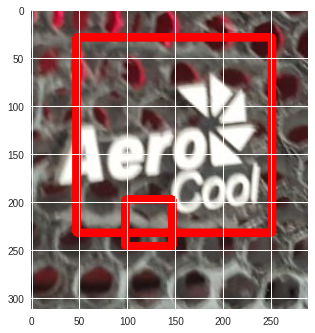

In [ ]:
img_c = img.copy()
for (x,y,w,h) in marcas:
    cv2.rectangle(img_c,(x,y),(x+w,y+h),(255,0,0),8)
    plt.imshow(img_c)